# Lending Club Case Study

## 1. Importing Necessary Library


In [495]:
# Numerical and Data Analysis
import numpy as np
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Extra
import warnings
warnings.filterwarnings('ignore')

## 2. Data Loading

In [496]:
Loan_df=pd.read_csv("loan.csv")

In [497]:
Loan_df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [498]:
Loan_df.shape

(39717, 111)

In [499]:
Loan_df.info(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

## 3. Checking Missing Value

In [500]:
100*Loan_df.isna().mean()

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [501]:
Loan_df.isna().sum().sort_values(ascending=False)

verification_status_joint    39717
annual_inc_joint             39717
mo_sin_old_rev_tl_op         39717
mo_sin_old_il_acct           39717
bc_util                      39717
                             ...  
delinq_amnt                      0
policy_code                      0
earliest_cr_line                 0
delinq_2yrs                      0
id                               0
Length: 111, dtype: int64

## 4. Removing columns

### 4.1 Removing Null columns

In [502]:
Loan_df.dropna(axis = 1, how = 'all', inplace = True)

In [503]:
Loan_df.shape

(39717, 57)

### 4.2 Removing same value columns:(If the column have same value in all rows, it will not usefull)

In [504]:
remove_columns_list = []
for i in Loan_df.columns:
    if Loan_df[i].nunique() == 1:
        remove_columns_list.append(i)


In [505]:
Loan_df.drop(remove_columns_list, axis = 1, inplace = True)

In [506]:
Loan_df.shape

(39717, 48)

### 4.3 Removing extra columns, Which are not require

In [507]:
drop_cols = [
 'collection_recovery_fee',
 'delinq_2yrs',
 'desc',
 'earliest_cr_line',
 'emp_title',
 'id',
 'inq_last_6mths',
 'last_credit_pull_d',
 'last_pymnt_amnt',
 'last_pymnt_d',
 'open_acc',
 'out_prncp',
 'out_prncp_inv',
 'pub_rec',
 'recoveries',
 'revol_bal',
 'revol_util',
 'title',
 'url',
 'zip_code'
]

Loan_df.drop(drop_cols, axis = 1, inplace = True)

In [508]:
Loan_df.shape

(39717, 28)

### 4.4 Removing Missing Data columns where Missing data >= 60%

In [509]:
for col in Loan_df.columns:
    missing_values = round(Loan_df[col].isna().sum() / Loan_df.shape[0], 2)
    if missing_values >= 0.60:
        Loan_df.drop(col, axis = 1, inplace = True)
        
Loan_df.shape

(39717, 25)

## 5. Removing Rows

### 5.1 Removing Current status from loan_status column

In [510]:
Loan_df = Loan_df[Loan_df['loan_status'].str.lower() != "current"]

In [511]:
Loan_df

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,purpose,addr_state,dti,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,pub_rec_bankruptcies
0,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,...,credit_card,AZ,27.65,9,5863.155187,5833.84,5000.00,863.16,0.00,0.0
1,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,...,car,GA,1.00,4,1008.710000,1008.71,456.46,435.17,0.00,0.0
2,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,...,small_business,IL,8.72,10,3005.666844,3005.67,2400.00,605.67,0.00,0.0
3,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,...,other,CA,20.00,37,12231.890000,12231.89,10000.00,2214.92,16.97,0.0
5,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,...,wedding,AZ,11.20,12,5632.210000,5632.21,5000.00,632.21,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,4 years,...,home_improvement,CO,11.33,40,2822.969293,1213.88,2500.00,322.97,0.00,NaN
39713,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,3 years,...,credit_card,NC,6.40,9,9913.491822,1020.51,8500.00,1413.49,0.00,NaN
39714,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,< 1 year,...,debt_consolidation,MA,2.30,20,5272.161128,1397.12,5000.00,272.16,0.00,NaN
39715,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,< 1 year,...,other,MD,3.72,26,5174.198551,672.66,5000.00,174.20,0.00,NaN


In [512]:
Loan_df.shape

(38577, 25)

### 5.2 Find the duplicate rows in data

In [513]:
duplicate_df = Loan_df.duplicated()
Loan_df[duplicate_df]

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,purpose,addr_state,dti,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,pub_rec_bankruptcies


## 6. Standardising Values


### 6.1 Standardise units

##### 6.1.1 Convert Loan date to datetime

In [514]:
Loan_df['issue_d'] = pd.to_datetime(Loan_df['issue_d'], format = '%b-%y')

##### 6.1.2 Convert Int_rate column to Float

In [515]:
Loan_df['int_rate'] = Loan_df['int_rate'].apply(lambda x: float(x.replace('%', '').strip()))

##### 6.1.3 Convert funded amount and loan amount to float

In [516]:
Loan_df = Loan_df.astype({
    'funded_amnt' : 'float',
    'loan_amnt' : 'float'
})

##### 6.1.4Rounding of the values to two decimal places


In [517]:
for cols in ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'total_pymnt', 
             'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'pub_rec_bankruptcies']:
    Loan_df[cols] = Loan_df[cols].apply(lambda x: round(x, 2))

##### 6.1.5 Convert term column to int

In [518]:
Loan_df['term'] = Loan_df['term'].apply(lambda x: int(x.replace('months', '').strip()))

In [519]:
Loan_df.info(1)

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   member_id             38577 non-null  int64         
 1   loan_amnt             38577 non-null  float64       
 2   funded_amnt           38577 non-null  float64       
 3   funded_amnt_inv       38577 non-null  float64       
 4   term                  38577 non-null  int64         
 5   int_rate              38577 non-null  float64       
 6   installment           38577 non-null  float64       
 7   grade                 38577 non-null  object        
 8   sub_grade             38577 non-null  object        
 9   emp_length            37544 non-null  object        
 10  home_ownership        38577 non-null  object        
 11  annual_inc            38577 non-null  float64       
 12  verification_status   38577 non-null  object        
 13  issue_d              

In [520]:
Loan_df

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,purpose,addr_state,dti,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,pub_rec_bankruptcies
0,1296599,5000.0,5000.0,4975.0,36,10.65,162.87,B,B2,10+ years,...,credit_card,AZ,27.65,9,5863.16,5833.84,5000.00,863.16,0.00,0.0
1,1314167,2500.0,2500.0,2500.0,60,15.27,59.83,C,C4,< 1 year,...,car,GA,1.00,4,1008.71,1008.71,456.46,435.17,0.00,0.0
2,1313524,2400.0,2400.0,2400.0,36,15.96,84.33,C,C5,10+ years,...,small_business,IL,8.72,10,3005.67,3005.67,2400.00,605.67,0.00,0.0
3,1277178,10000.0,10000.0,10000.0,36,13.49,339.31,C,C1,10+ years,...,other,CA,20.00,37,12231.89,12231.89,10000.00,2214.92,16.97,0.0
5,1311441,5000.0,5000.0,5000.0,36,7.90,156.46,A,A4,3 years,...,wedding,AZ,11.20,12,5632.21,5632.21,5000.00,632.21,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92174,2500.0,2500.0,1075.0,36,8.07,78.42,A,A4,4 years,...,home_improvement,CO,11.33,40,2822.97,1213.88,2500.00,322.97,0.00,NaN
39713,90607,8500.0,8500.0,875.0,36,10.28,275.38,C,C1,3 years,...,credit_card,NC,6.40,9,9913.49,1020.51,8500.00,1413.49,0.00,NaN
39714,90390,5000.0,5000.0,1325.0,36,8.07,156.84,A,A4,< 1 year,...,debt_consolidation,MA,2.30,20,5272.16,1397.12,5000.00,272.16,0.00,NaN
39715,89243,5000.0,5000.0,650.0,36,7.43,155.38,A,A2,< 1 year,...,other,MD,3.72,26,5174.20,672.66,5000.00,174.20,0.00,NaN


### 6.2 Sorting columns in ascending order

In [521]:
Loan_df = Loan_df.reindex(sorted(Loan_df.columns), axis=1)

In [522]:
Loan_df

,addr_state,annual_inc,dti,emp_length,funded_amnt,funded_amnt_inv,grade,home_ownership,installment,int_rate,...,purpose,sub_grade,term,total_acc,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,verification_status
0,AZ,24000.0,27.65,10+ years,5000.0,4975.0,B,RENT,162.87,10.65,...,credit_card,B2,36,9,5863.16,5833.84,863.16,0.00,5000.00,Verified
1,GA,30000.0,1.00,< 1 year,2500.0,2500.0,C,RENT,59.83,15.27,...,car,C4,60,4,1008.71,1008.71,435.17,0.00,456.46,Source Verified
2,IL,12252.0,8.72,10+ years,2400.0,2400.0,C,RENT,84.33,15.96,...,small_business,C5,36,10,3005.67,3005.67,605.67,0.00,2400.00,Not Verified
3,CA,49200.0,20.00,10+ years,10000.0,10000.0,C,RENT,339.31,13.49,...,other,C1,36,37,12231.89,12231.89,2214.92,16.97,10000.00,Source Verified
5,AZ,36000.0,11.20,3 years,5000.0,5000.0,A,RENT,156.46,7.90,...,wedding,A4,36,12,5632.21,5632.21,632.21,0.00,5000.00,Source Verified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,CO,110000.0,11.33,4 years,2500.0,1075.0,A,MORTGAGE,78.42,8.07,...,home_improvement,A4,36,40,2822.97,1213.88,322.97,0.00,2500.00,Not Verified
39713,NC,18000.0,6.40,3 years,8500.0,875.0,C,RENT,275.38,10.28,...,credit_card,C1,36,9,9913.49,1020.51,1413.49,0.00,8500.00,Not Verified
39714,MA,100000.0,2.30,< 1 year,5000.0,1325.0,A,MORTGAGE,156.84,8.07,...,debt_consolidation,A4,36,20,5272.16,1397.12,272.16,0.00,5000.00,Not Verified
39715,MD,200000.0,3.72,< 1 year,5000.0,650.0,A,MORTGAGE,155.38,7.43,...,other,A2,36,26,5174.20,672.66,174.20,0.00,5000.00,Not Verified


### 6.3 Looking Outliers

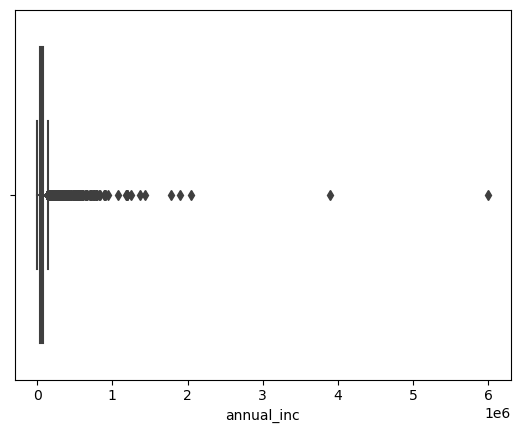

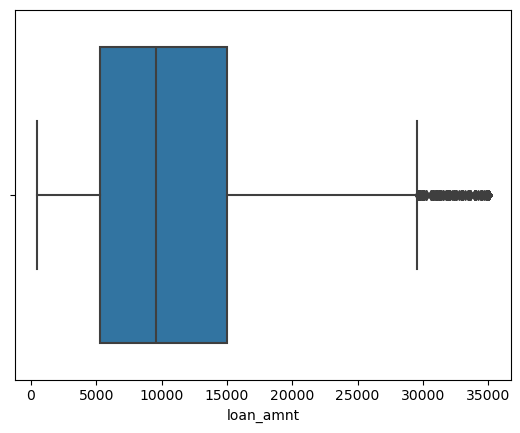

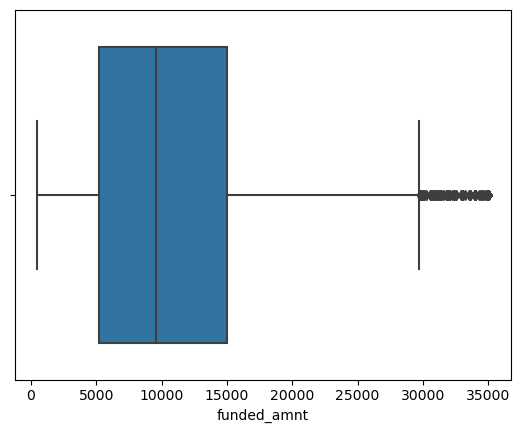

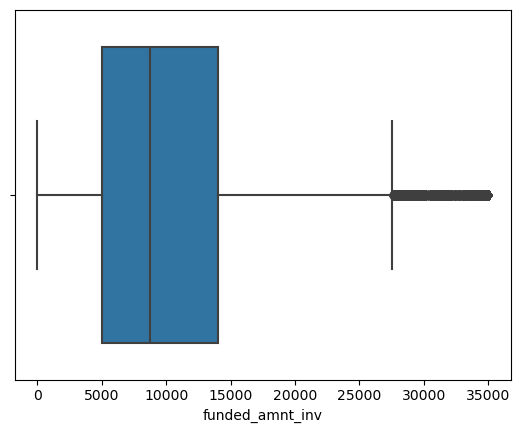

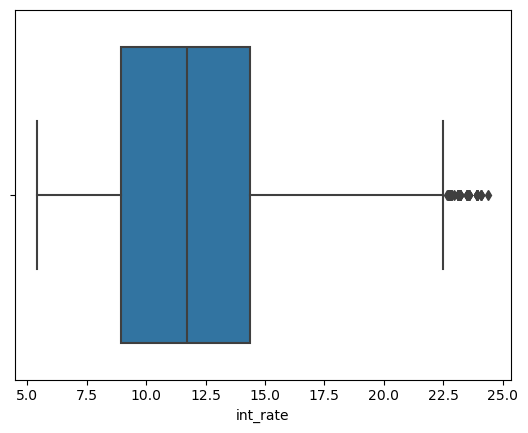

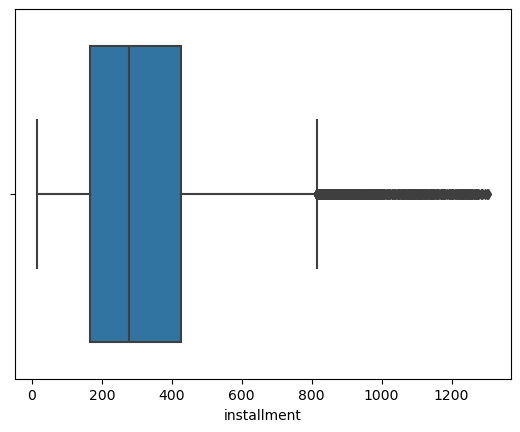

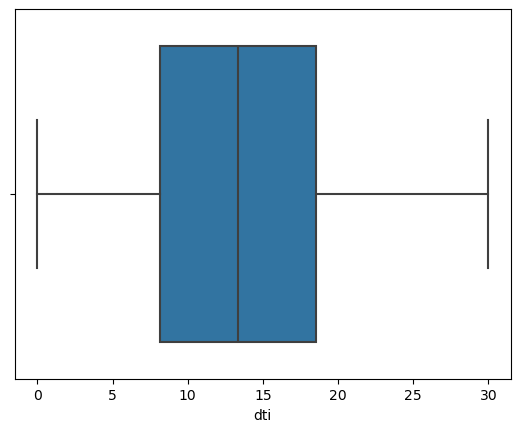

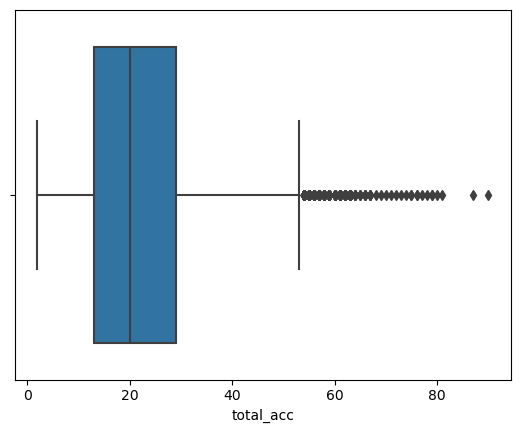

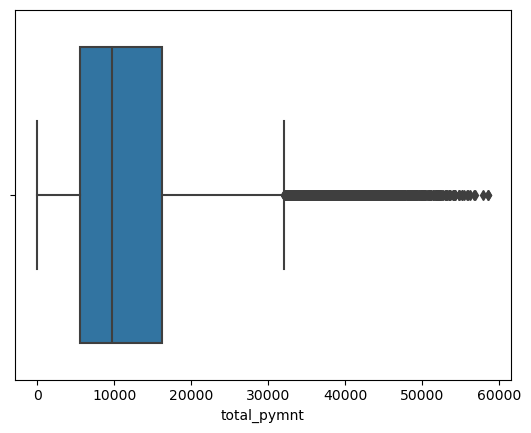

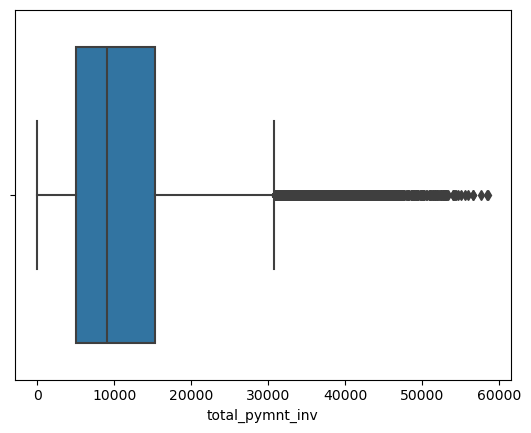

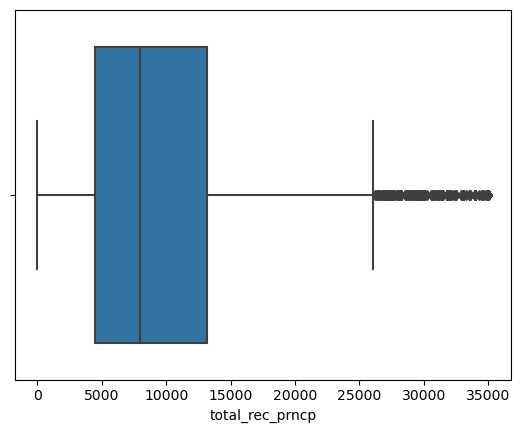

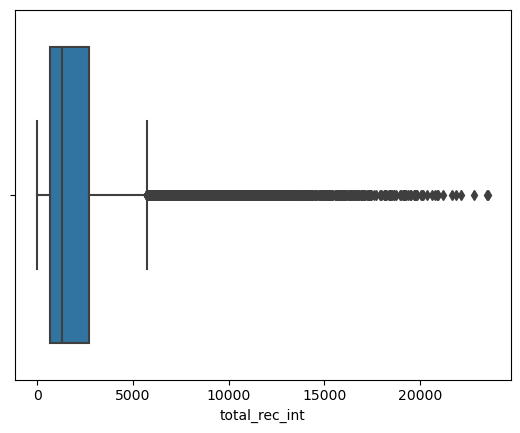

In [564]:
for col in ['annual_inc', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'dti'
           , 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int']:
    sns.boxplot(x=Loan_df[col])
    plt.show()

#### 6.3.1 Annual income have Outliers

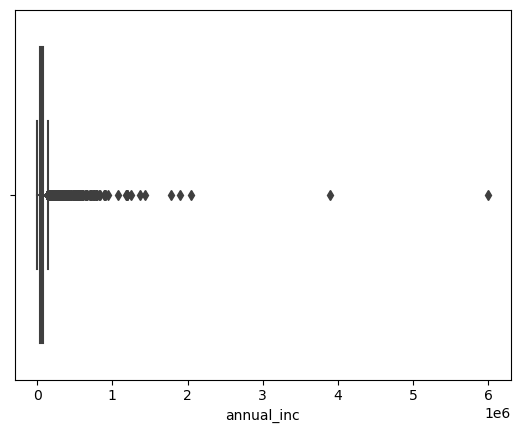

In [524]:
sns.boxplot(x=Loan_df["annual_inc"])
plt.show()

#### 6.3.2 Removing Outliers from Annual income

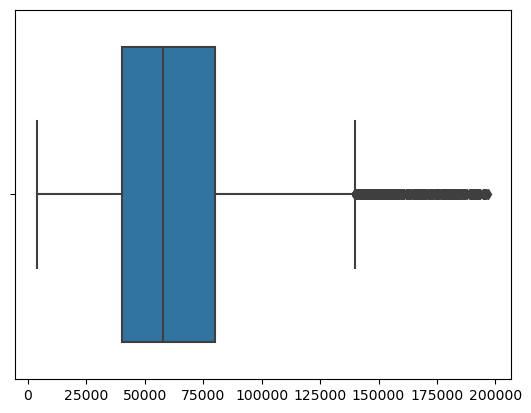

In [563]:
elements = np.array(Loan_df["annual_inc"])

mean = np.mean(elements, axis=0)
sd = np.std(elements, axis=0)

final_list = [x for x in Loan_df["annual_inc"] if (x > mean - 2 * sd)]
final_list = [x for x in final_list if (x < mean + 2 * sd)]
sns.boxplot(x=final_list)
plt.show()

#### 6.3.4 detailed outline for Outliers

##### 1. Most loan applicants make between 40000 to 75000 USD per year.
##### 2. Most loan applicants have loan amounts between 5000 to 15,000.
##### 3. Most loan applicants have funded amounts between 5000 to 15000 USD.
##### 4. For the majority of loan applicants, the funded amount by investors ranges from 5000 to 14000.
##### 5. The loan has an interest rate ranging from 9% to 14%.
##### 6. The loan has monthly installments ranging from 160 to 440.
##### 7. There is an 8–18 debt to income ratio.

### 6.4 Checking Missing Values and Null values in dataset

In [566]:
Loan_df.isna().sum()

addr_state                 0
annual_inc                 0
dti                        0
emp_length              1033
funded_amnt                0
funded_amnt_inv            0
grade                      0
home_ownership             0
installment                0
int_rate                   0
issue_d                    0
loan_amnt                  0
loan_status                0
member_id                  0
pub_rec_bankruptcies     697
purpose                    0
sub_grade                  0
term                       0
total_acc                  0
total_pymnt                0
total_pymnt_inv            0
total_rec_int              0
total_rec_late_fee         0
total_rec_prncp            0
verification_status        0
dtype: int64

#### 6.4.1 Removing pub_rec_bankruptcies null values which are not useful

In [568]:
Loan_df = Loan_df[Loan_df.pub_rec_bankruptcies.notna()] 